# Automating Trading Operations

## Capital Management

### Kelly Criterion in Binomial Setting

In [2]:
import math
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import plt, mpl

np.random.seed(1000)
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

/tmp/ipykernel_15371/3635527203.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
p = 0.55

f = p - (1 - p)

I = 50
n = 100

In [4]:
def run_simulation(f):
    c = np.zeros((n, I))
    c[0] = 100
    for i in range(I):
        for t in range(1, n):
            o = np.random.binomial(1, p)
            if o > 0:
                c[t, i] = (1 + f) * c[t - 1, i]
            else:
                c[t, i] = (1 - f) * c[t - 1, i]
    return c

In [6]:
c_1 = run_simulation(f)
c_1

array([[100.        , 100.        , 100.        , ..., 100.        ,
        100.        , 100.        ],
       [110.        ,  90.        ,  90.        , ..., 110.        ,
         90.        , 110.        ],
       [121.        ,  99.        ,  81.        , ...,  99.        ,
         81.        , 121.        ],
       ...,
       [413.2697403 ,  45.45500129, 617.35356267, ..., 185.1965553 ,
        226.35134536, 413.2697403 ],
       [454.59671433,  40.90950116, 555.6182064 , ..., 203.71621083,
        203.71621083, 454.59671433],
       [500.05638576,  45.00045127, 500.05638576, ..., 224.08783191,
        183.34458974, 500.05638576]])

In [7]:
c_1.round(2)

array([[100.  , 100.  , 100.  , ..., 100.  , 100.  , 100.  ],
       [110.  ,  90.  ,  90.  , ..., 110.  ,  90.  , 110.  ],
       [121.  ,  99.  ,  81.  , ...,  99.  ,  81.  , 121.  ],
       ...,
       [413.27,  45.46, 617.35, ..., 185.2 , 226.35, 413.27],
       [454.6 ,  40.91, 555.62, ..., 203.72, 203.72, 454.6 ],
       [500.06,  45.  , 500.06, ..., 224.09, 183.34, 500.06]])

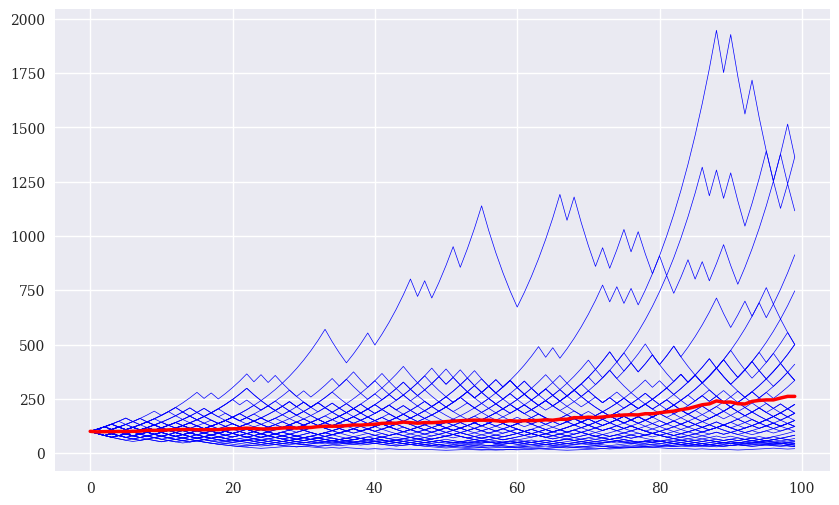

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(c_1, 'b', lw=0.5)
plt.plot(c_1.mean(axis=1), 'r', lw=2.5)

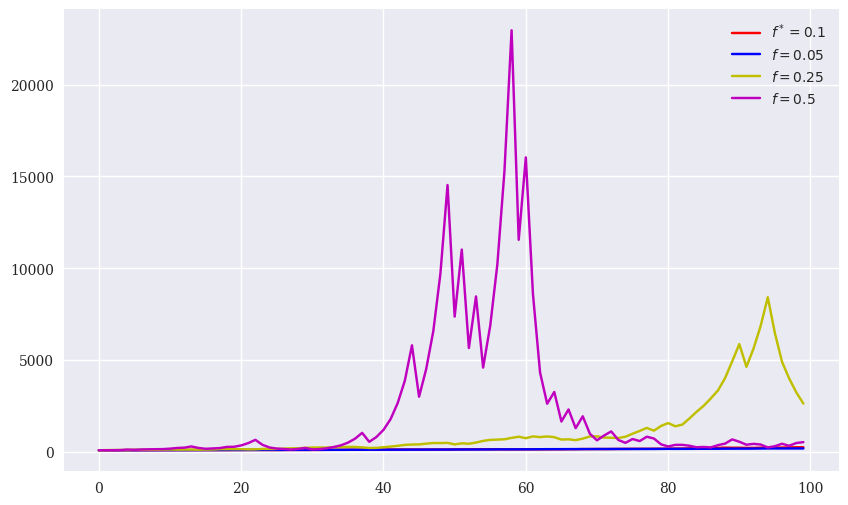

In [15]:
c_2 = run_simulation(0.05)
c_3 = run_simulation(0.25)
c_4 = run_simulation(0.5)

plt.figure(figsize=(10, 6))
plt.plot(c_1.mean(axis=1), 'r', label='$f^*=0.1$')
plt.plot(c_2.mean(axis=1), 'b', label='$f=0.05$')
plt.plot(c_3.mean(axis=1), 'y', label='$f=0.25$')
plt.plot(c_4.mean(axis=1), 'm', label='$f=0.5$')
plt.legend(loc=0)

### Kelly Criterion for Stocks and Indices